In [2]:
import xarray as xr 


## Cutting some of the satellite files to be used for testing and saving as netcdf

In [2]:
#ds=xr.open_dataset("/glade/scratch/knocasio/W_XX-EUMETSAT-Darmstadt,VIS+IR+IMAGERY,MSG1+SEVIRI_C_EUMG_20060901000009.nc", decode_cf=True) 

## Open data and setting decode_cf = True will take care of offset and scale factor issue 
ds=xr.open_mfdataset("/glade/scratch/knocasio/W_XX-EUMETSAT-Darmstadt,VIS+IR+IMAGERY,MSG1+SEVIRI_C_EUMG_20060901*.nc", 
                     concat_dim='time',combine='nested', parallel=True, decode_cf=True) 

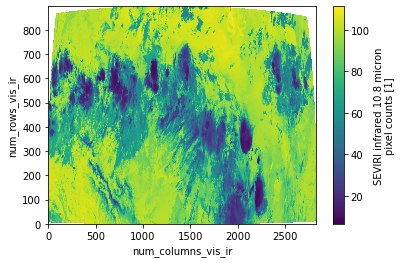

In [132]:
## Assign coordiantes to ch9 to be able to use where to select region of interest 
ch9 = ds.ch9
ch9= ds.ch9.assign_coords(lon=ds.lon, lat=ds.lat)

## Using .where with drop=True will drop all other lats and lons that are not of interest
ch9_new = ch9.where( (ch9.lat >= -5) & (ch9.lat <=20) & (ch9.lon >= -40) & (ch9.lon <=50), drop=True)

## Checking that correct region is selected using plot via xarray 
ch9_new.isel(time=1).plot()

## Save as netcdf and compress for space on github 
#ch9_new.to_netcdf("Satellite_data.nc", encoding={"ch9": dict(zlib=True, complevel=9), "lat": dict(zlib=True, complevel=9), "lon": dict(zlib=True, complevel=9)}) 

In [6]:
# ds[["ch9", "lat", "lon"]].ch9.plot(robust=True)
## Cheking on decode_cf = True
#ds.ch9.min().compute()
#xr.open_dataset("/glade/scratch/knocasio/W_XX-EUMETSAT-Darmstadt,VIS+IR+IMAGERY,MSG1+SEVIRI_C_EUMG_20060901000009.nc").ch9.max()

# TAMS

## Identity contours 

In [ ]:
## Load data 
ds = xr.open_dataset("Satellite_data.nc")

## Converting from Radiance to Brightness Temp
Temp=(( ( 1.43877 ) * ( 930.659 ) )./log ( ( ( (1.19104*10^(-5) ) * ( (930.659)^3 ) )./ds.ch9 ) + 1 )-0.627)./0.9983;

#TempB=real(Temp);

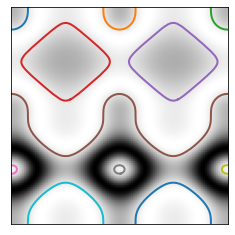

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure


# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [3]:
c

array([[9.93902734, 0.        ],
       [9.86521017, 1.        ],
       [9.63842842, 2.        ],
       [9.24067178, 3.        ],
       [9.        , 3.42487608],
       [8.64744355, 4.        ],
       [8.        , 4.80005934],
       [7.80754532, 5.        ],
       [7.        , 5.71101032],
       [6.56942992, 6.        ],
       [6.        , 6.3556701 ],
       [5.        , 6.79944214],
       [4.31568262, 7.        ],
       [4.        , 7.09578373],
       [3.        , 7.28305412],
       [2.        , 7.37835474],
       [1.        , 7.41346629],
       [0.        , 7.41849616]])